In [1]:
import numpy as np
import scipy
import cv2
import skimage.io as skio
import skimage as sk

# Part 2

#### Part 2.1

In [2]:
def get_high_frequencies(img, kernel_width):
    kernel = -cv2.getGaussianKernel(kernel_width, kernel_width / 6) @ cv2.getGaussianKernel(kernel_width, kernel_width / 6).T
    kernel[kernel_width // 2][kernel_width // 2] += 1
    return scipy.signal.convolve2d(img, kernel, mode="same")
def sharpen_one_channel(img, kernel_width, alpha):
    high_frequency_img = get_high_frequencies(img, kernel_width)
    res_img = np.clip(img + alpha * high_frequency_img, 0.0, 1.0)
    return res_img
def sharpen_one_image(img, kernel_width, alpha):
    curr_stacked = []
    for i in range(img.shape[-1]):
        curr_stacked.append(sharpen_one_channel(img[:, :, i], kernel_width, alpha))
    return np.dstack(tuple(curr_stacked))

In [17]:
im = skio.imread(f"data/2.1/to_sharpen/books.jpg")
im = sk.img_as_float(im)
im = im[:, :, :3] # For when the image is originally a png (with RGBA).

In [18]:
res = sharpen_one_image(im, kernel_width=9, alpha=3)
res_int = (res * 255).astype(np.uint8)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_82268/3845226209.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(res_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_82268/3845226209.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


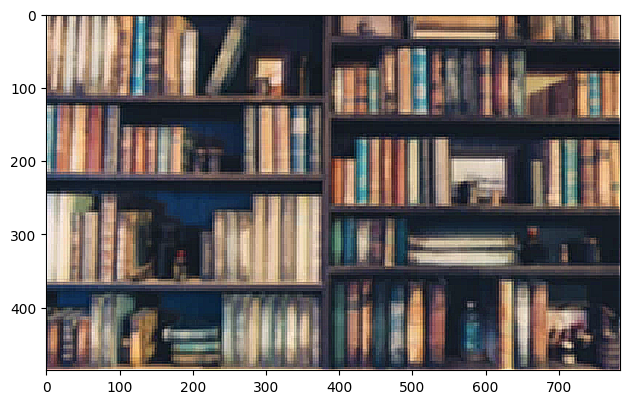

In [19]:
skio.imshow(res_int)
skio.show()
#skio.imsave(f"data/2.1/sharpened_res/taj_3.jpg", res_int)

In [20]:
curr_high_freqs = []
for channel in range(im.shape[-1]):
    curr_high_freqs.append(get_high_frequencies(im[:, :, channel], kernel_width=9))

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_82268/1901817876.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(high_freqs_visual)


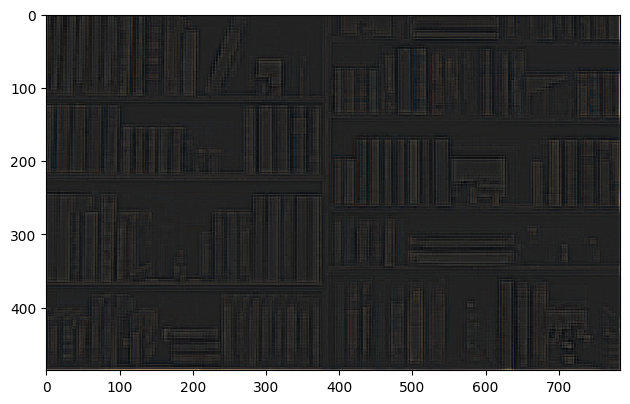

In [21]:
high_freqs = np.dstack(tuple(curr_high_freqs))
high_freqs_min, high_freqs_max = np.min(high_freqs), np.max(high_freqs)
high_freqs_visual = ((high_freqs - high_freqs_min) / (high_freqs_max - high_freqs_min) * 255).astype(np.uint8)
skio.imshow(high_freqs_visual)
skio.imsave("data/2.1/doe_high_freq.jpg", high_freqs_visual)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_82268/2778741389.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(im)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_82268/2778741389.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


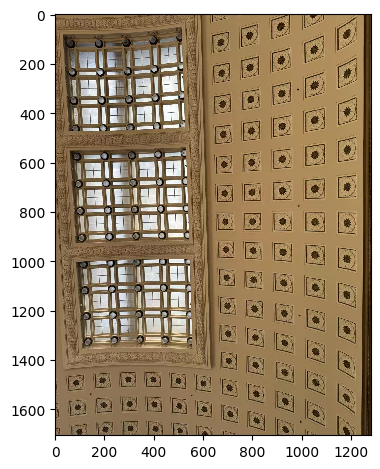

In [14]:
# Evaluation: load sharp image.
im = skio.imread(f"data/2.1/evaluation/doe.jpg")
im = sk.img_as_float(im)
im = im[:, :, :3] # For when the image is originally a png (with RGBA).
skio.imshow(im)
skio.show()

In [197]:
def make_img_blurry(img, kernel):
    curr_channels = []
    for channel in range(img.shape[-1]):
        curr_channels.append(scipy.signal.convolve2d(img[:, :, channel], kernel, mode="same"))
    return np.dstack(tuple(curr_channels))

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_51878/4117302333.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(blurred_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_51878/4117302333.py:8: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


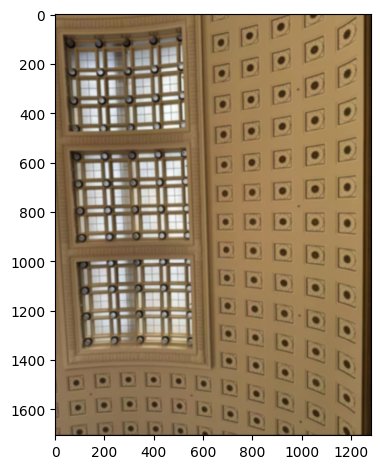

In [201]:
# Evaluation: Make image blurry.
kernel_width = 18
kernel = cv2.getGaussianKernel(kernel_width, kernel_width / 6) @ cv2.getGaussianKernel(kernel_width, kernel_width / 6).T
im_blurred = make_img_blurry(im, kernel)

blurred_int = (im_blurred * 255).astype(np.uint8)
skio.imshow(blurred_int)
skio.show()
skio.imsave(f"data/2.1/evaluation/doe_blurred.jpg", blurred_int)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_51878/2917071682.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(res_int)
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_51878/2917071682.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


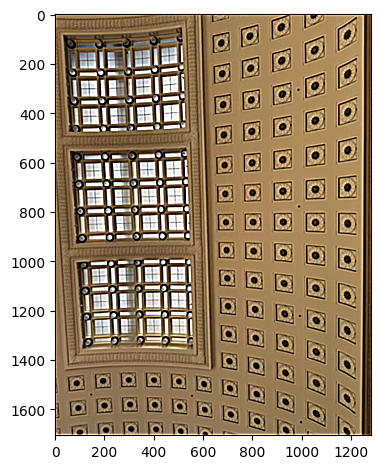

: 

In [ ]:
# Evaluation: re-sharpen the image.
res = sharpen_one_image(im_blurred, kernel_width=18, alpha=8)
res_int = (res * 255).astype(np.uint8)
skio.imshow(res_int)
skio.show()
skio.imsave(f"data/2.1/evaluation/doe_resharpened.jpg", res_int)

#### Part 2.2

In [3]:
def get_low_frequencies(img, kernel_width):
    kernel = cv2.getGaussianKernel(kernel_width, kernel_width / 6) @ cv2.getGaussianKernel(kernel_width, kernel_width / 6).T
    return scipy.signal.convolve2d(img, kernel, mode="same")
def blend_one_channel(im1, im2, kernel_width1, kernel_width2):
    high_frequency_img2 = get_high_frequencies(im2, kernel_width2)
    low_frequency_img1 = get_low_frequencies(im1, kernel_width1)
    res_img = np.clip(high_frequency_img2 + low_frequency_img1, 0.0, 1.0)
    return res_img
def blend_all_channels(im1, im2, kernel_width1, kernel_width2):
    curr_stacked = []
    for i in range(im1.shape[-1]):
        curr_stacked.append(blend_one_channel(im1[:, :, i], im2[:, :, i], kernel_width1, kernel_width2))
    return np.dstack(tuple(curr_stacked))

In [4]:
from hybrid_python.align_image_code import *

In [68]:
im1 = (skio.imread(f"data/2.2/raw_pairs/3_low.jpg") / 255).astype(np.float32)
im2 = (skio.imread(f"data/2.2/raw_pairs/3_high.jpg") / 255).astype(np.float32)
im1 = im1[:, :, :3]
im2 = im2[:, :, :3]

In [69]:
# Optional if images are already aligned.
%matplotlib qt
im2, im1 = align_images(im2, im1)

Please select 2 points in each image for alignment.


In [70]:
%matplotlib inline

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_66748/1523765400.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(im1)


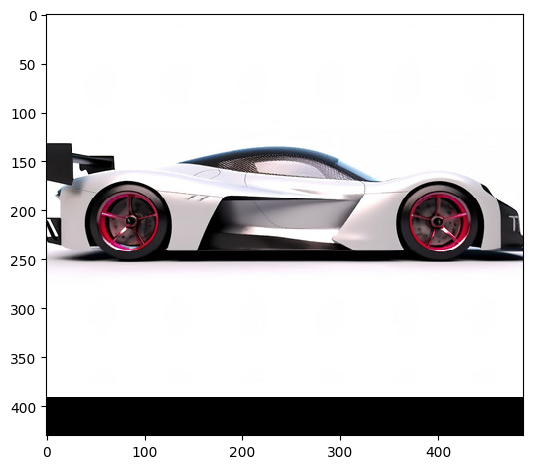

In [72]:
skio.imshow(im1)

In [ ]:
# Only keep parts of the image for visuals. Optional.
#im1_cropped = im1[50:350, 50:350, :]
#im2_cropped = im2[50:350, 50:350, :]

In [90]:
res = blend_all_channels(im1, im2, 25, 10)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_66748/3972225161.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow((res * 255).astype(np.uint8))
/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_66748/3972225161.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


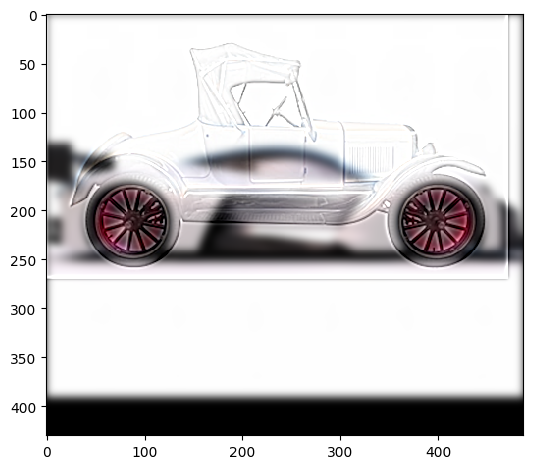

In [91]:
skio.imshow((res * 255).astype(np.uint8))
skio.show()

In [92]:
img_int = (res * 255).astype(np.uint8)
skio.imsave(f"data/2.2/merged_results/3_res.jpg", (res * 255).astype(np.uint8))

#### Part 2.2 Frequency Domain plots.

In [67]:
im1_grayscale = np.average(im1, axis=2)
im2_grayscale = np.average(im2, axis=2)

In [77]:
im1_grayscale_low_freq = get_low_frequencies(im1_grayscale, 20)
im2_grayscale_high_freq = get_high_frequencies(im2_grayscale, 10)
grayscale_res = np.clip(im1_grayscale_low_freq + im2_grayscale_high_freq, 0.0, 1.0)

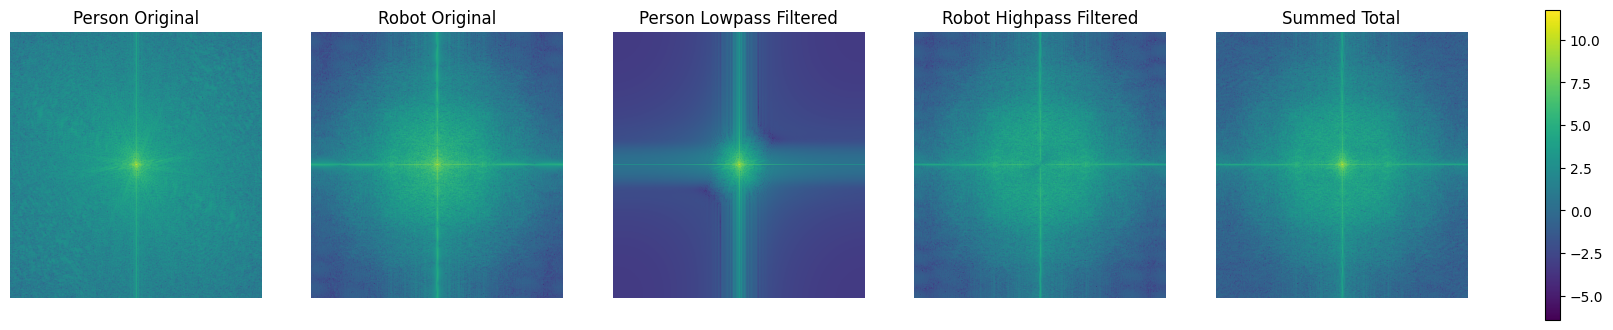

In [101]:
from matplotlib.colors import Normalize

fig, axes = plt.subplots(1, 5, figsize=(20, 6))

plots = [np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1_grayscale)))),
         np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2_grayscale)))),
         np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1_grayscale_low_freq)))),
         np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2_grayscale_high_freq)))),
         np.log(np.abs(np.fft.fftshift(np.fft.fft2(grayscale_res))))]
plot_names = ["Person Original", "Robot Original", "Person Lowpass Filtered", "Robot Highpass Filtered", "Summed Total"]

global_minimum = np.min(np.dstack(tuple(plots)))
global_maximum = np.max(np.dstack(tuple(plots)))

norm = Normalize(vmin=global_minimum, vmax=global_maximum)

for i in np.arange(5):
    mappable = axes[i].imshow(plots[i], norm=norm)
    axes[i].set_title(plot_names[i])
    axes[i].axis("off")
""" 
mappable = axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1_grayscale)))))
axes[0].set_title("Person Original")
axes[0].axis("off")

axes[1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2_grayscale)))))
axes[1].set_title("Robot Original")
axes[1].axis("off")

axes[2].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1_grayscale_low_freq)))))
axes[2].set_title("Person Lowpass Filtered")
axes[2].axis("off")

axes[3].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2_grayscale_high_freq)))))
axes[3].set_title("Robot Highpass Filtered")
axes[3].axis("off")

axes[4].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(grayscale_res)))))
axes[4].set_title("Summed Total")
axes[4].axis("off") """

#plt.tight_layout()
plt.colorbar(mappable=mappable, ax=axes, fraction=0.01)
plt.show()

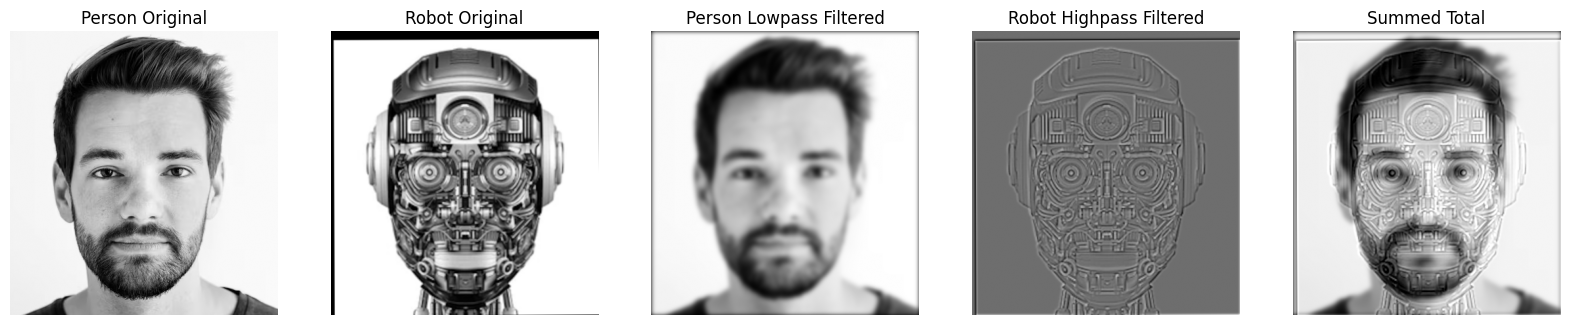

In [104]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

plots = [im1_grayscale,
         im2_grayscale,
         im1_grayscale_low_freq,
         im2_grayscale_high_freq,
         grayscale_res]
plot_names = ["Person Original", "Robot Original", "Person Lowpass Filtered", "Robot Highpass Filtered", "Summed Total"]

for i in np.arange(5):
    mappable = axes[i].imshow(plots[i], cmap='gray')
    axes[i].set_title(plot_names[i])
    axes[i].axis("off")

#### Part 2.3

In [110]:
def get_gaussian_stack(img, levels=7, kernel_std=3.0):
    imgs_stack = [img]
    curr_img = img
    final_std = kernel_std * np.sqrt(levels)
    kernel_width = 6 * int(final_std)
    gaussian_kernel = cv2.getGaussianKernel(kernel_width, kernel_std) @ cv2.getGaussianKernel(kernel_width, kernel_std).T
    for i in range(1, levels):
        curr_img = scipy.signal.convolve2d(curr_img, gaussian_kernel, mode="same")
        imgs_stack.append(curr_img)
    return imgs_stack

def get_laplacian_stack(gaussian_stack):
    imgs_stack = []
    for i in range(len(gaussian_stack) - 1):
        imgs_stack.append(gaussian_stack[i] - gaussian_stack[i + 1])
    return imgs_stack

def get_gaussian_and_laplacian_stacks(img, levels=7, kernel_std=3.0):
    gaussian_stack = get_gaussian_stack(img, levels, kernel_std)
    laplacian_stack = get_laplacian_stack(gaussian_stack)
    return gaussian_stack, laplacian_stack

def get_gaussian_and_laplacian_stacks_all_channels(img, levels=7, kernel_std=3.0):
    # Schema: [(channel1_gaussian, channel1_laplacian), ..., (channeln_gaussian, channeln_laplacian)]
    stacks = []
    for i in range(img.shape[-1]):
        stacks.append(get_gaussian_and_laplacian_stacks(img[:,:,i], levels, kernel_std))
    return stacks

In [111]:
def get_stack_one_image(img, mask_stack, levels=7, kernel_std=3.0):
    gaussian_laplacian_stacks = get_gaussian_and_laplacian_stacks_all_channels(img, levels, kernel_std)
    channels_masked = []
    for channel in range(len(gaussian_laplacian_stacks)):
        curr_stack = []
        laplacian_stack = gaussian_laplacian_stacks[channel][1]
        for level in range(len(laplacian_stack)):
            curr_stack.append(laplacian_stack[level] * mask_stack[level])
        # Final low-frequency Gaussian image masking
        curr_stack.append(gaussian_laplacian_stacks[channel][0][-1] * mask_stack[-1])
        channels_masked.append(curr_stack)
    
    # Convert to RGB
    masked_stack = []
    for level in range(len(channels_masked[0])):
        curr_level_masked = []
        for channel in range(len(channels_masked)):
            curr_level_masked.append(channels_masked[channel][level])
        masked_stack.append(np.dstack(tuple(curr_level_masked)))
    
    return masked_stack

def get_merged_stack(img1, img2, mask, levels=7, img_kernel_std=5.0, mask_kernel_std=10.0):
    mask_stack1 = get_gaussian_stack(mask, levels, mask_kernel_std)
    mask_stack2 = []
    for i in range(len(mask_stack1)):
        mask_stack2.append(1 - mask_stack1[i])
    img1_stack = get_stack_one_image(img1, mask_stack1, levels=levels, kernel_std=img_kernel_std)
    img2_stack = get_stack_one_image(img2, mask_stack2, levels=levels, kernel_std=img_kernel_std)
    merged_stack = []
    for i in range(len(img1_stack)):
        merged_stack.append(img1_stack[i] + img2_stack[i])
    return merged_stack

def get_merged_img(merged_stack):
    curr_img = merged_stack[0]
    for i in range(1, len(merged_stack)):
        curr_img += merged_stack[i]
    return np.clip(curr_img, 0.0, 1.0)

# DEPRECATED
def get_merged_stack_all_channels_horizontal(img1, img2, mask, levels=7, kernel_std=3.0):
    gaussian_laplacian_stacks1 = get_gaussian_and_laplacian_stacks_all_channels(img1, levels, kernel_std)
    gaussian_laplacian_stacks2 = get_gaussian_and_laplacian_stacks_all_channels(img2, levels, kernel_std)
    gaussian_stack_mask = get_gaussian_stack(mask, levels, kernel_std)
    channels_merged = []
    for channel in range(len(gaussian_laplacian_stacks1)):
        curr_stack = []
        laplacian_stack1 = gaussian_laplacian_stacks1[channel][1]
        laplacian_stack2 = gaussian_laplacian_stacks2[channel][1]
        for level in range(len(laplacian_stack1)):
            merged = laplacian_stack1[level] * gaussian_stack_mask[level] + (1 - gaussian_stack_mask[level]) * laplacian_stack2[level]
            curr_stack.append(merged)
        # Final low-frequency Gaussian image merging.
        merged_final = gaussian_laplacian_stacks1[channel][0][-1] * gaussian_stack_mask[-1] + (1 - gaussian_stack_mask[-1]) * gaussian_laplacian_stacks2[channel][0][-1]
        curr_stack.append(merged_final)
        channels_merged.append(curr_stack)
    
    # Convert to RGB image.
    merged_stack = []
    for level in range(len(channels_merged[0])):
        curr_level_merged = []
        for channel in range(len(channels_merged)):
            curr_level_merged.append(channels_merged[channel][level])
        merged_stack.append(np.dstack(tuple(curr_level_merged)))
    
    return merged_stack

In [112]:
def visualize_img(img):
    img_min, img_max = np.min(img), np.max(img)
    img_range = img_max - img_min
    img_demeaned = img - img_min
    img_int = (img_demeaned * 255 / img_range).astype(np.uint8)
    return img_int

In [274]:
apple = skio.imread(f"data/2.3/spline/apple.jpeg")
apple = sk.img_as_float(apple)
orange = skio.imread(f"data/2.3/spline/orange.jpeg")
orange = sk.img_as_float(orange)

In [275]:
ones_width = int(apple.shape[1] * 0.475)
zeros_width = apple.shape[1] - ones_width
mask = np.hstack((np.ones((apple.shape[0], ones_width)), np.zeros((apple.shape[0], zeros_width))))

gaussian_stack_mask = get_gaussian_stack(mask, 5, 15.0)

In [276]:
merged_stack = get_merged_stack(apple, orange, mask, levels=5, img_kernel_std=5.0, mask_kernel_std=15.0)

In [146]:
merged_img = get_merged_img(merged_stack)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_51878/1620284307.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(merged_img)


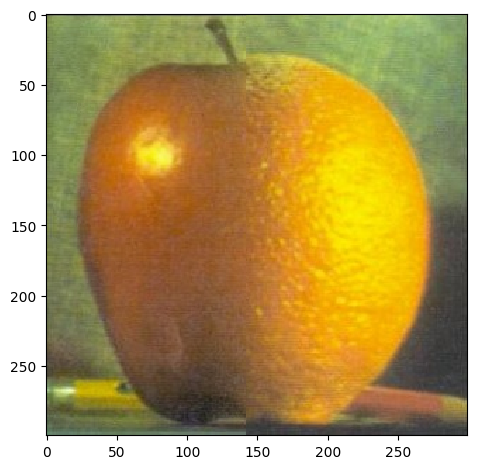

In [147]:
skio.imshow(merged_img)

In [115]:
im1 = (skio.imread(f"data/2.3/inputs/1_1.jpg") / 255).astype(np.float32)
im2 = (skio.imread(f"data/2.3/inputs/1_2.jpg") / 255).astype(np.float32)
im1 = im1[:, :, :3]
im2 = im2[:, :, :3]

In [123]:
im1_resized = cv2.resize(im1, (600, 400))
im2_resized = cv2.resize(im2, (600, 400))

In [102]:
# Optional if images are already aligned.
%matplotlib qt
im1, im2 = align_images(im1, im2)

Please select 2 points in each image for alignment.


In [103]:
%matplotlib inline

In [217]:
zeros_height = 115
ones_height = 400 - 115
mask = np.vstack((np.zeros((zeros_height, 600)), np.ones((ones_height, 600))))

merged_stack = get_merged_stack(im1_resized, im2_resized, mask, levels=6, img_kernel_std=7.0, mask_kernel_std=7.0)
#merged_img = get_merged_img(merged_stack)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_66748/2365424867.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(im1_resized[115:, :, :])


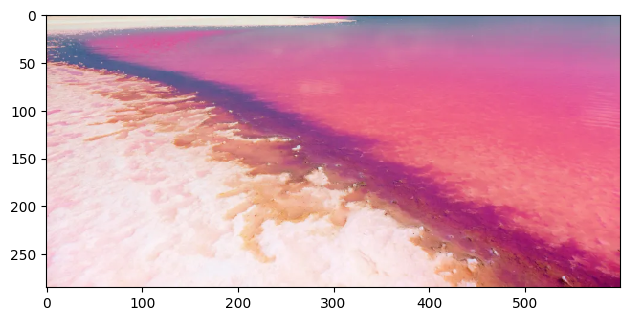

In [213]:
skio.imshow(im1_resized[115:, :, :])

In [218]:
merged_img = get_merged_img(merged_stack)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_66748/1620284307.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(merged_img)


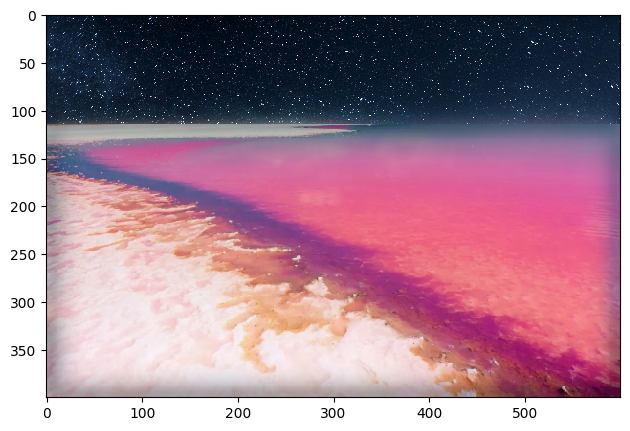

In [223]:
skio.imshow(merged_img)

In [ ]:
skio.imsave("data/2.3/outputs/1_res.jpg", (merged_img * 255).astype(np.uint8))

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_66748/425508698.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(visualize_img(merged_stack[1]))


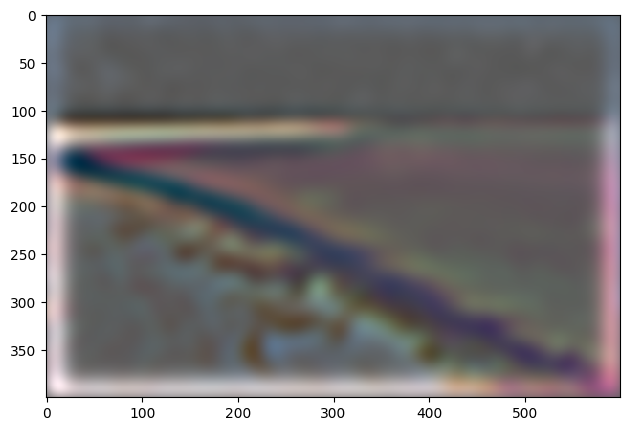

In [190]:
skio.imshow(visualize_img(merged_stack[1]))

In [277]:
masked_stack_apple = get_stack_one_image(apple, gaussian_stack_mask, levels=5, kernel_std=5.0)
orange_mask = []
for i in range(len(gaussian_stack_mask)):
    orange_mask.append(1 - gaussian_stack_mask[i])
masked_stack_orange = get_stack_one_image(orange, orange_mask, levels=5, kernel_std=5.0)

In [278]:
apple_img = masked_stack_apple[0].copy()
for i in range(1, len(masked_stack_apple)):
    apple_img += masked_stack_apple[i]

orange_img = masked_stack_orange[0].copy()
for i in range(1, len(masked_stack_orange)):
    orange_img += masked_stack_orange[i]

result_img = apple_img + orange_img
result_img = np.clip(result_img, 0.0, 1.0)
apple_img = np.clip(apple_img, 0.0, 1.0)
orange_img = np.clip(orange_img, 0.0, 1.0)

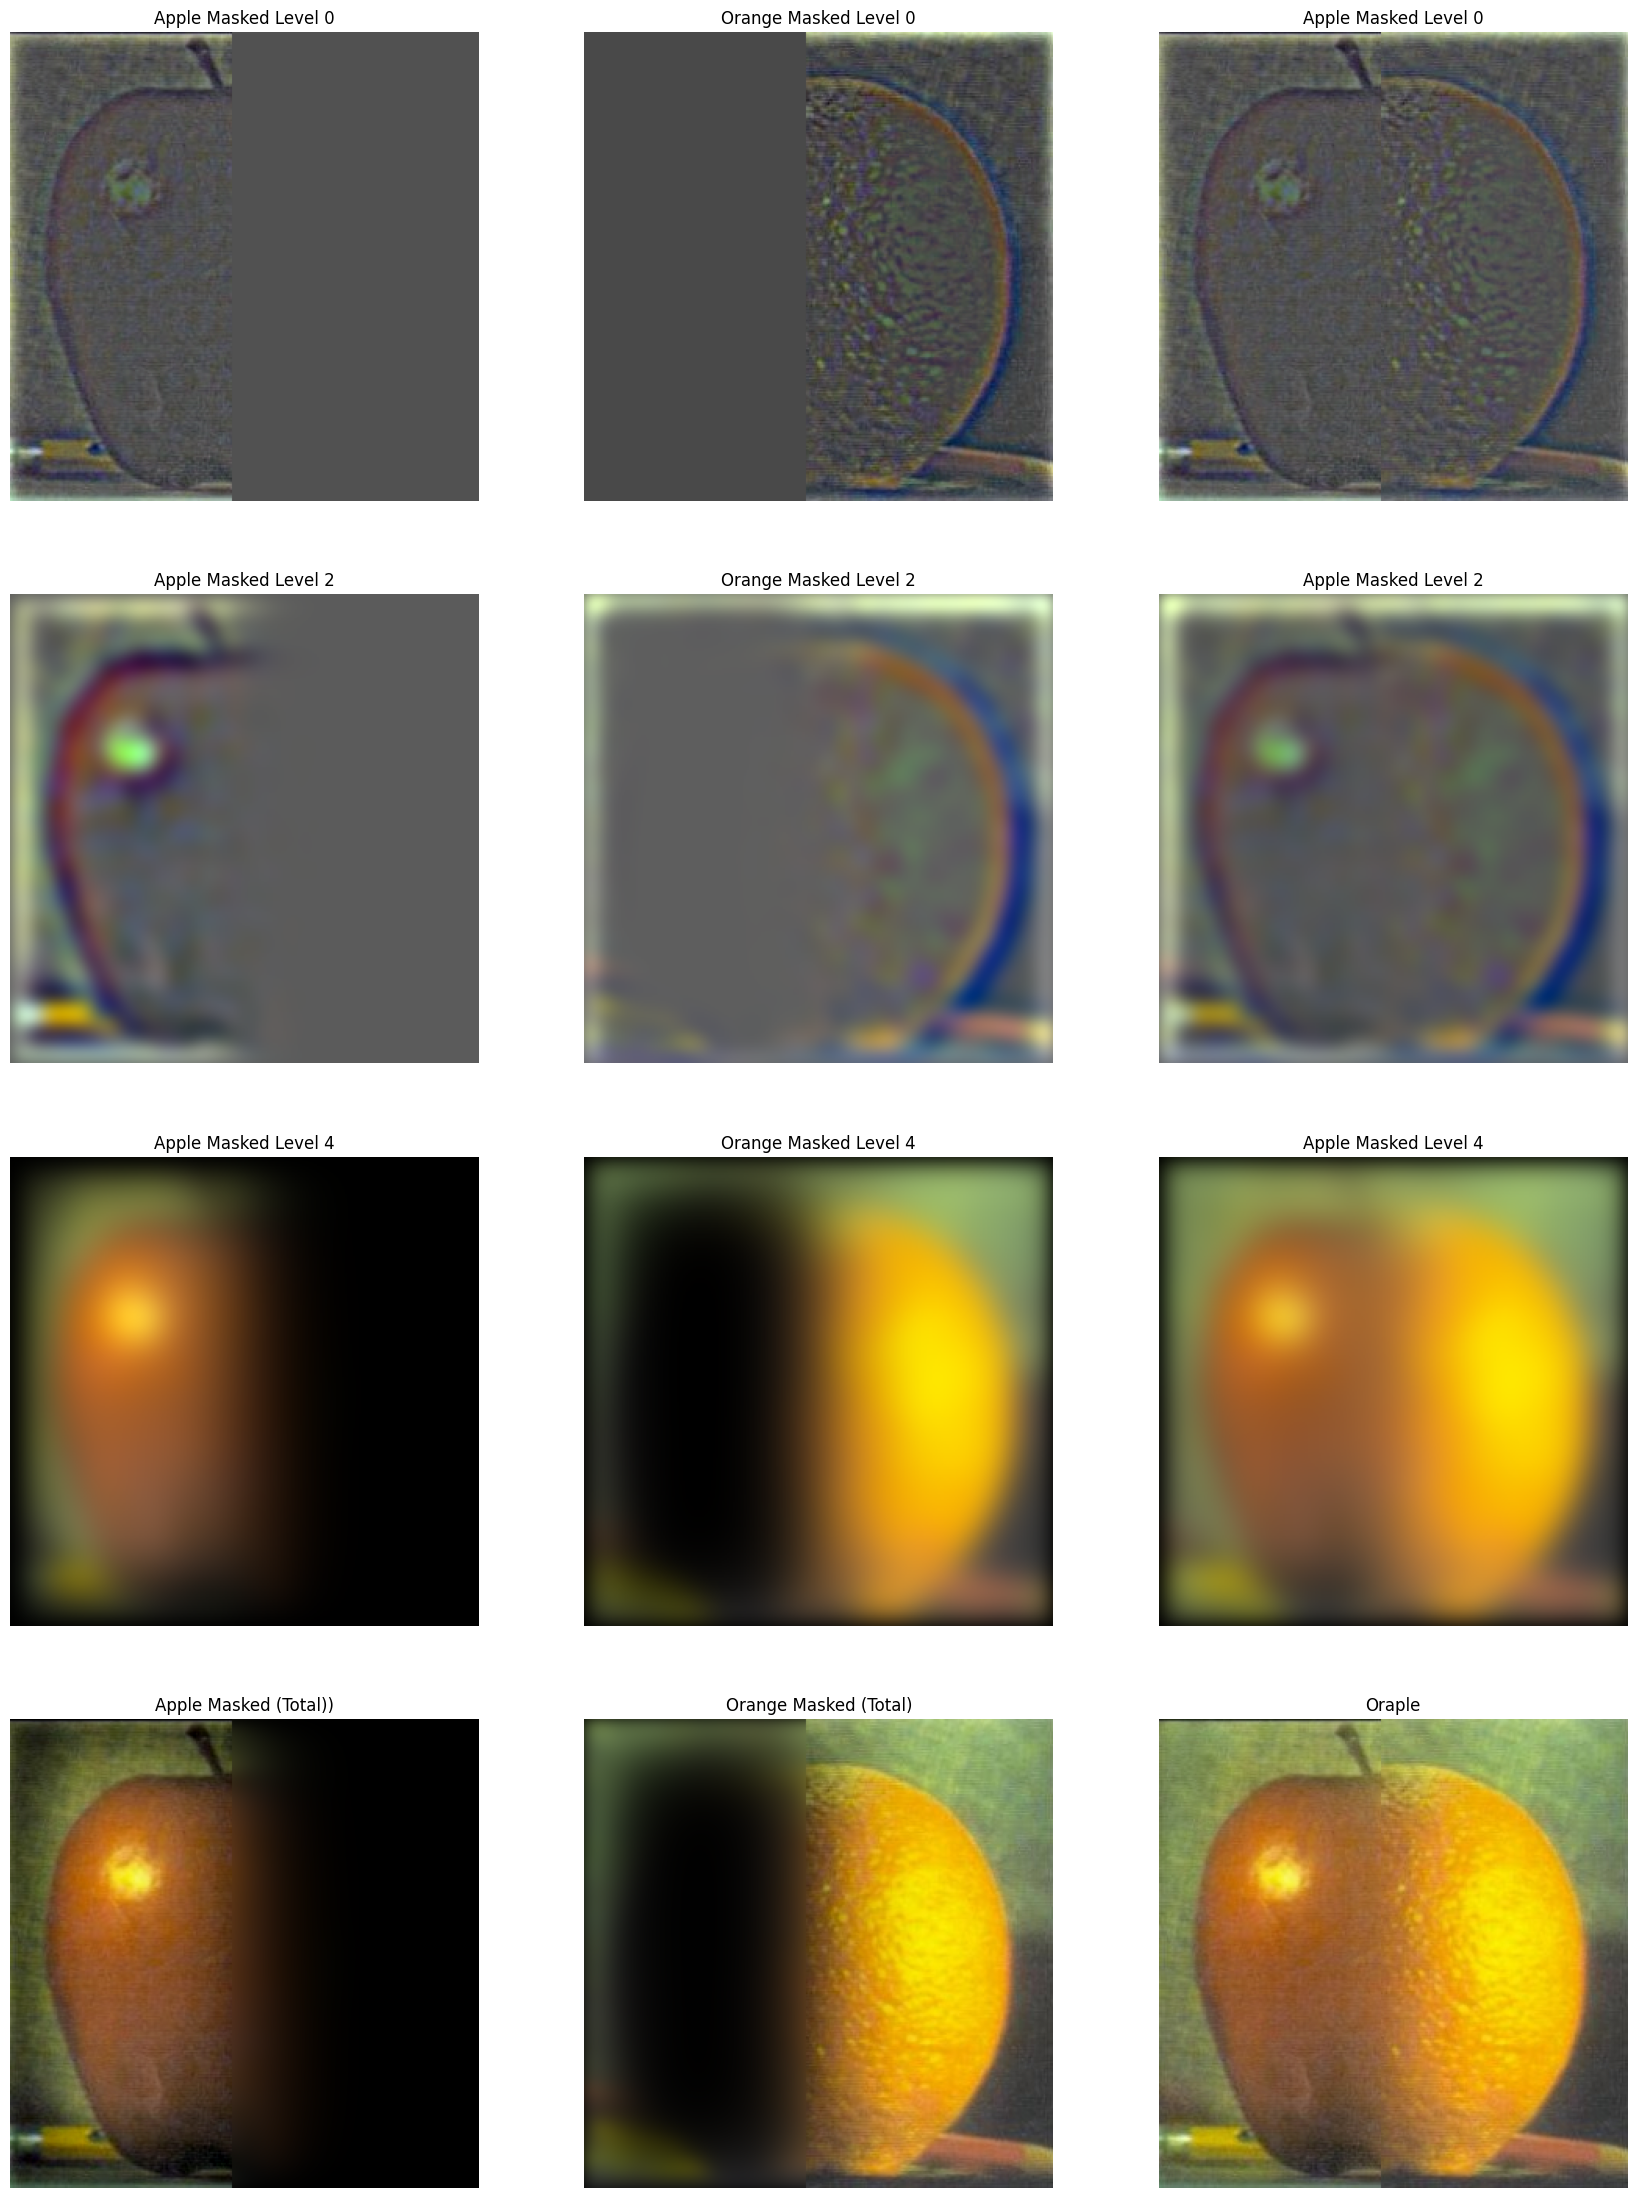

In [279]:
fig, axes = plt.subplots(4, 3, figsize=(21, 28))

axes[0][0].imshow(visualize_img(masked_stack_apple[0]))
axes[0][0].set_title("Apple Masked Level 0")
axes[0][0].axis("off")

axes[0][1].imshow(visualize_img(masked_stack_orange[0]))
axes[0][1].set_title("Orange Masked Level 0")
axes[0][1].axis("off")

axes[0][2].imshow(visualize_img(masked_stack_apple[0] + masked_stack_orange[0]))
axes[0][2].set_title("Apple Masked Level 0")
axes[0][2].axis("off")

axes[1][0].imshow(visualize_img(masked_stack_apple[2]))
axes[1][0].set_title("Apple Masked Level 2")
axes[1][0].axis("off")

axes[1][1].imshow(visualize_img(masked_stack_orange[2]))
axes[1][1].set_title("Orange Masked Level 2")
axes[1][1].axis("off")

axes[1][2].imshow(visualize_img(masked_stack_apple[2] + masked_stack_orange[2]))
axes[1][2].set_title("Apple Masked Level 2")
axes[1][2].axis("off")

axes[2][0].imshow(visualize_img(masked_stack_apple[4]))
axes[2][0].set_title("Apple Masked Level 4")
axes[2][0].axis("off")

axes[2][1].imshow(visualize_img(masked_stack_orange[4]))
axes[2][1].set_title("Orange Masked Level 4")
axes[2][1].axis("off")

axes[2][2].imshow(visualize_img(masked_stack_apple[4] + masked_stack_orange[4]))
axes[2][2].set_title("Apple Masked Level 4")
axes[2][2].axis("off")

axes[2][0].imshow(visualize_img(masked_stack_apple[4]))
axes[2][0].set_title("Apple Masked Level 4")
axes[2][0].axis("off")

axes[2][1].imshow(visualize_img(masked_stack_orange[4]))
axes[2][1].set_title("Orange Masked Level 4")
axes[2][1].axis("off")

axes[2][2].imshow(visualize_img(masked_stack_apple[4] + masked_stack_orange[4]))
axes[2][2].set_title("Apple Masked Level 4")
axes[2][2].axis("off")

axes[3][0].imshow(apple_img)
axes[3][0].set_title("Apple Masked (Total))")
axes[3][0].axis("off")

axes[3][1].imshow(orange_img)
axes[3][1].set_title("Orange Masked (Total)")
axes[3][1].axis("off")

axes[3][2].imshow(result_img)
axes[3][2].set_title("Oraple")
axes[3][2].axis("off")

#plt.tight_layout()
plt.show()

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_66748/3287391307.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(visualize_img(masked_stack_apple[4]))


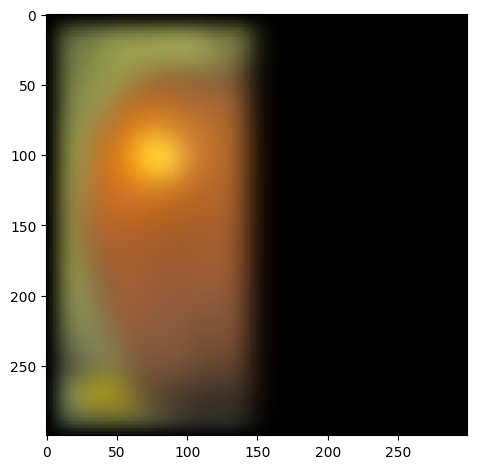

In [198]:
skio.imshow(visualize_img(masked_stack_apple[4]))

In [253]:
im1 = (skio.imread(f"data/2.3/inputs/2_1.jpg") / 255).astype(np.float32)
im2 = (skio.imread(f"data/2.3/inputs/2_2.jpg") / 255).astype(np.float32)
im1 = im1[:, :, :3]
im2 = im2[:, :, :3]

In [254]:
im2_cropped = im2[:400, 12:, :]
im1_cropped = im1[150:690, :810, :]
im1_cropped = cv2.resize(im1_cropped, (600, 400))

In [255]:
irregular_mask = cv2.imread("data/2.3/irregular_mask2.jpg", 0)
irregular_mask = (irregular_mask / 255).astype(np.float32)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_66748/3827233438.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(irregular_mask)


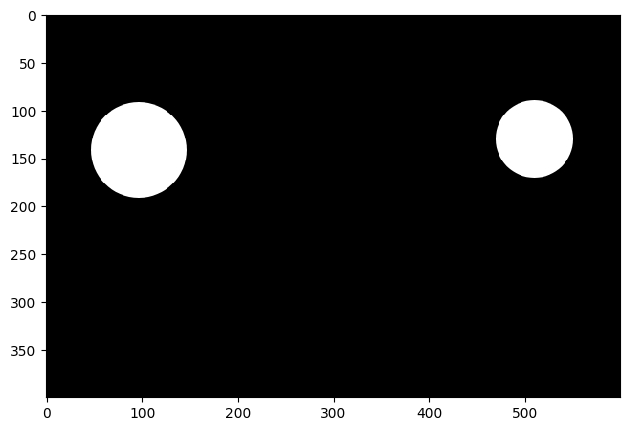

In [256]:
skio.imshow(irregular_mask)

In [257]:
merged_stack = get_merged_stack(im1_cropped, im2_cropped, irregular_mask, levels=7, img_kernel_std=5.0, mask_kernel_std=5.0)

In [258]:
merged_img = get_merged_img(merged_stack)

/var/folders/zd/6l9_l17d02d4msw14wpqz0lw0000gn/T/ipykernel_66748/1620284307.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(merged_img)


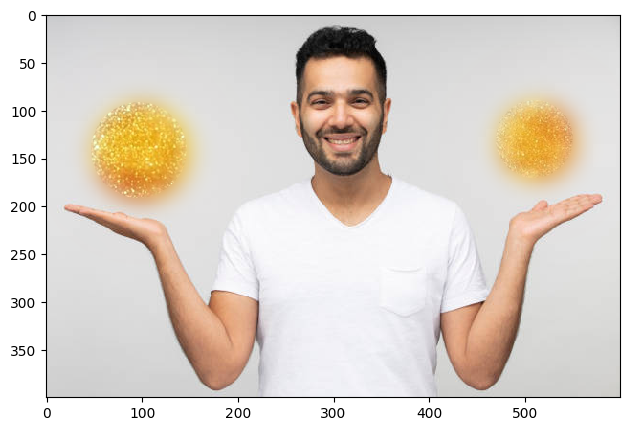

In [259]:
skio.imshow(merged_img)

In [260]:
skio.imsave(f"data/2.3/outputs/2_res.jpg", (merged_img * 255).astype(np.uint8))

In [261]:
gaussian_stack_mask = get_gaussian_stack(irregular_mask, 7, 5.0)
masked_stack_fire = get_stack_one_image(im1_cropped, gaussian_stack_mask, levels=7, kernel_std=5.0)
person_mask = []
for i in range(len(gaussian_stack_mask)):
    person_mask.append(1 - gaussian_stack_mask[i])
masked_stack_person = get_stack_one_image(im2_cropped, person_mask, levels=7, kernel_std=5.0)

In [271]:
fire_img = masked_stack_fire[0].copy()
for i in range(1, len(masked_stack_fire)):
    fire_img += masked_stack_fire[i]

person_img = masked_stack_person[0].copy()
for i in range(1, len(masked_stack_person)):
    person_img += masked_stack_person[i]

result_img = fire_img + person_img
result_img = np.clip(result_img, 0.0, 1.0)
fire_img = np.clip(fire_img, 0.0, 1.0)
person_img = np.clip(person_img, 0.0, 1.0)

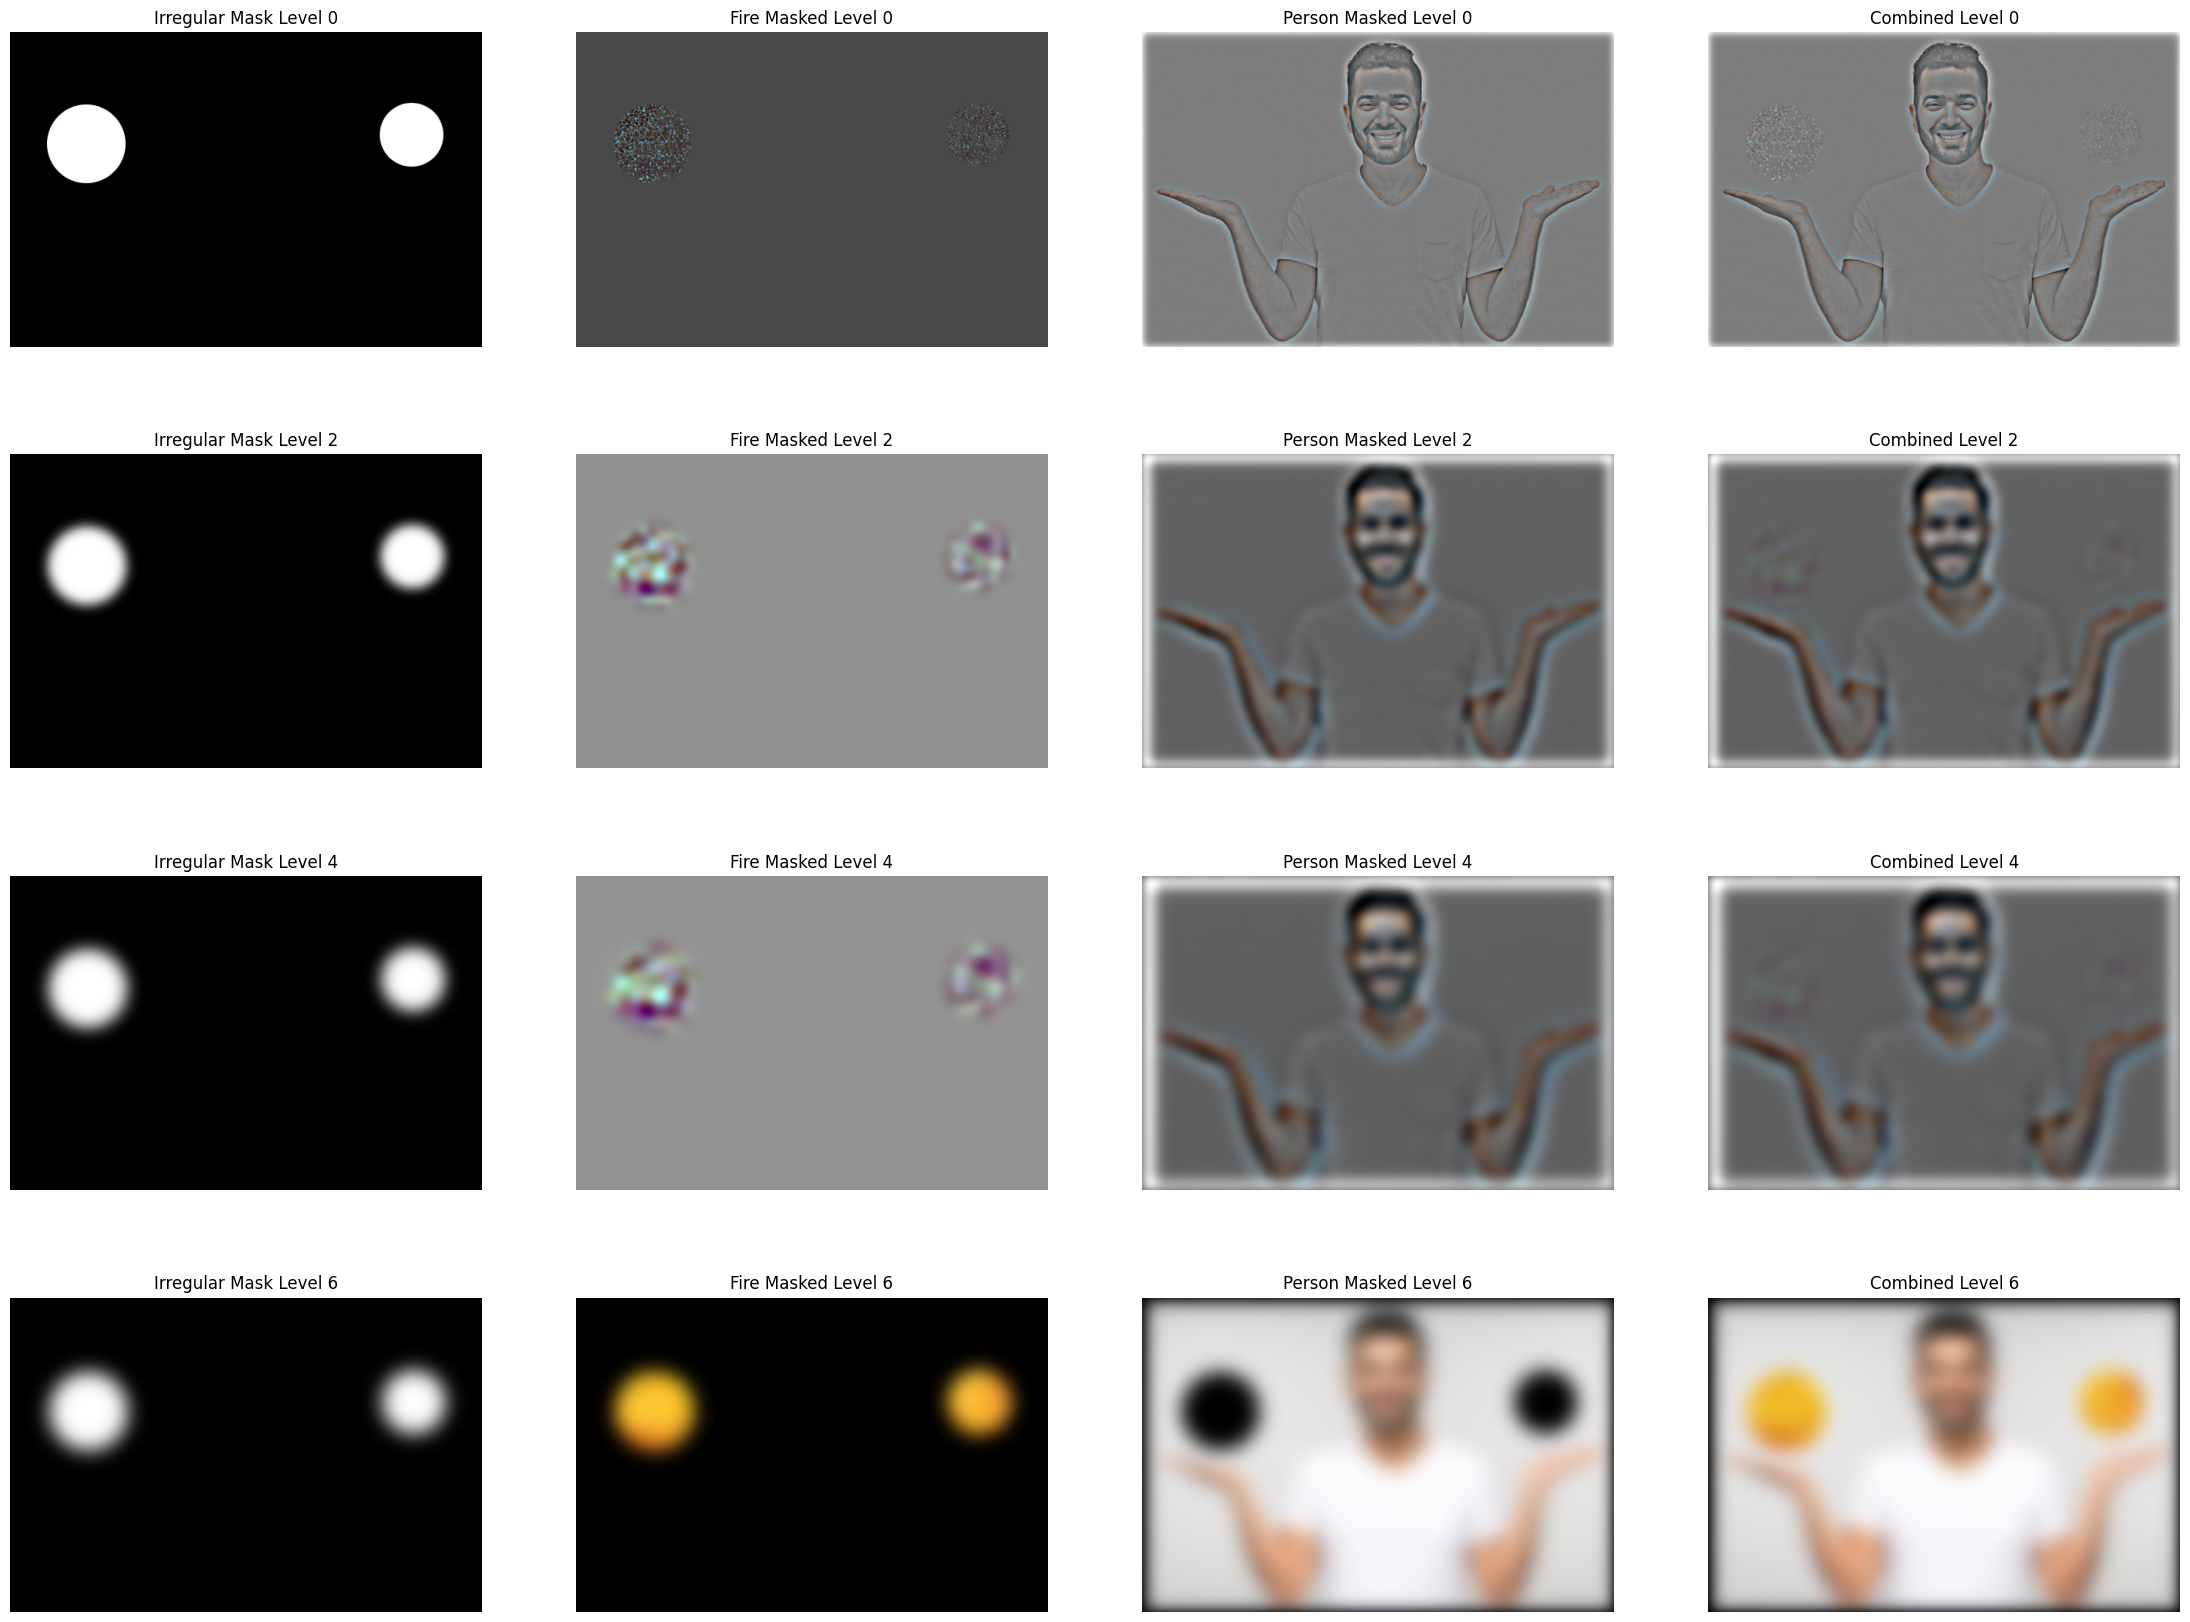

In [270]:
fig, axes = plt.subplots(4, 4, figsize=(28, 21))

axes[0][0].imshow(gaussian_stack_mask[0], cmap='gray')
axes[0][0].set_title("Irregular Mask Level 0")
axes[0][0].axis("off")

axes[0][1].imshow(visualize_img(masked_stack_fire[0]))
axes[0][1].set_title("Fire Masked Level 0")
axes[0][1].axis("off")

axes[0][2].imshow(visualize_img(masked_stack_person[0]))
axes[0][2].set_title("Person Masked Level 0")
axes[0][2].axis("off")

axes[0][3].imshow(visualize_img(masked_stack_fire[0] + masked_stack_person[0]))
axes[0][3].set_title("Combined Level 0")
axes[0][3].axis("off")

axes[1][0].imshow(gaussian_stack_mask[2], cmap='gray')
axes[1][0].set_title("Irregular Mask Level 2")
axes[1][0].axis("off")

axes[1][1].imshow(visualize_img(masked_stack_fire[2]))
axes[1][1].set_title("Fire Masked Level 2")
axes[1][1].axis("off")

axes[1][2].imshow(visualize_img(masked_stack_person[2]))
axes[1][2].set_title("Person Masked Level 2")
axes[1][2].axis("off")

axes[1][3].imshow(visualize_img(masked_stack_fire[2] + masked_stack_person[2]))
axes[1][3].set_title("Combined Level 2")
axes[1][3].axis("off")

axes[2][0].imshow(gaussian_stack_mask[4], cmap='gray')
axes[2][0].set_title("Irregular Mask Level 4")
axes[2][0].axis("off")

axes[2][1].imshow(visualize_img(masked_stack_fire[4]))
axes[2][1].set_title("Fire Masked Level 4")
axes[2][1].axis("off")

axes[2][2].imshow(visualize_img(masked_stack_person[4]))
axes[2][2].set_title("Person Masked Level 4")
axes[2][2].axis("off")

axes[2][3].imshow(visualize_img(masked_stack_fire[4] + masked_stack_person[4]))
axes[2][3].set_title("Combined Level 4")
axes[2][3].axis("off")

axes[3][0].imshow(gaussian_stack_mask[6], cmap='gray')
axes[3][0].set_title("Irregular Mask Level 6")
axes[3][0].axis("off")

axes[3][1].imshow(visualize_img(masked_stack_fire[6]))
axes[3][1].set_title("Fire Masked Level 6")
axes[3][1].axis("off")

axes[3][2].imshow(visualize_img(masked_stack_person[6]))
axes[3][2].set_title("Person Masked Level 6")
axes[3][2].axis("off")

axes[3][3].imshow(visualize_img(masked_stack_fire[6] + masked_stack_person[6]))
axes[3][3].set_title("Combined Level 6")
axes[3][3].axis("off")

#plt.tight_layout()
plt.show()

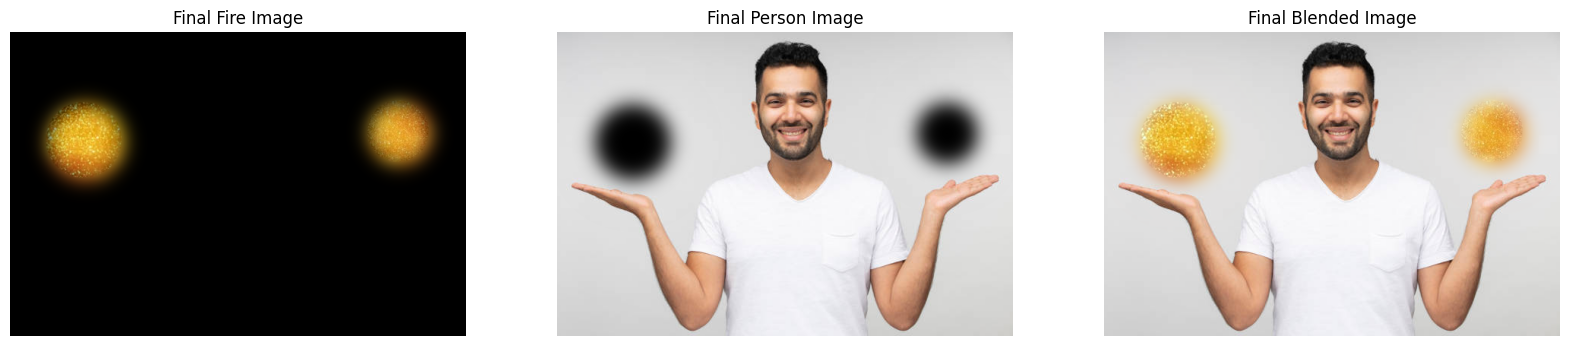

In [273]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].imshow(fire_img)
axes[0].set_title("Final Fire Image")
axes[0].axis("off")

axes[1].imshow(person_img)
axes[1].set_title("Final Person Image")
axes[1].axis("off")

axes[2].imshow(result_img)
axes[2].set_title("Final Blended Image")
axes[2].axis("off")

plt.show()